In [ ]:
K-MEANS-CLUSTERING

K means clustering is another simplified algorithm in machine learning. It is categorized into unsupervised learning because here we don’t know the result already (no idea about which cluster will be formed). This algorithm is used for vector quantization of the data and has been taken from signal processing methodology. Here the data is divided into several groups, data points in each group have similar characteristics. These clusters are decided by calculating the distance between data points. This distance is a measure of the relationship among numerous data points lying unclaimed.

k-Means Clustering

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
Each point is closer to its own cluster center than to other cluster centers.
Those two assumptions are the basis of the k-means model. We will soon dive into exactly how the algorithm reaches this solution, but for now let's take a look at a simple dataset and see the k-means result.

First, let's generate a two-dimensional dataset containing four distinct blobs. To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

ModuleNotFoundError: ignored

In [ ]:
By eye, it is relatively easy to pick out the four clusters. The k-means algorithm does this automatically, and in Scikit-Learn uses the typical estimator API:

SyntaxError: ignored

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Plotting the data:

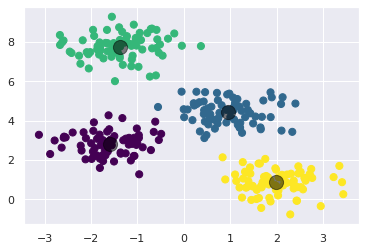

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

K means clustering algorithm steps

Choose a random number of centroids in the data. i.e k=3.

Choose the same number of random points on the 2D canvas as centroids.

Calculate the distance of each data point from the centroids.

Allocate the data point to a cluster where its distance from the centroid is minimum.

Recalculate the new centroids.

Recalculate the distance from each data point to new centroids.

Repeat the steps from point 3, till no data point change its cluster.

K means divides the data into various clusters and the number of clusters is equal to the value of k i.e. if k=3 then the data will be divided into 3 clusters. each value of k is a centroid around which the data points will gather.

K-means clustering implementation

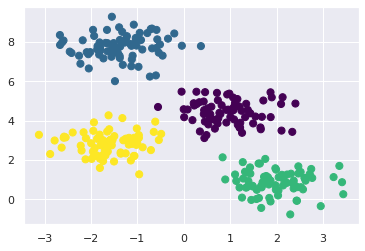

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');